<a href="https://colab.research.google.com/github/Yashwati-patel/Airbnb_booking_analysis/blob/main/Final_notebook_Airbnb_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Airbnb, lnc. is an American company that operates an online marketplace for loding, primarily homestays for vacation rentals, and tourism activities. Based in SAN FRANSCISCO, california, the platform is accessible via website and mobile app**.

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

### Importing libraries

In [6]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')



### Mounting drive and importing the data set. 

In [7]:
## Mounting drive and importing the data set.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# loading csv file
data = pd.read_csv('/content/drive/MyDrive/Airbnb_data.csv')

# New Section

In [9]:
# Displays first five record
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
# display last five record
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [11]:
# Shape of data
data.shape

(48895, 16)

In [12]:
# To know details over datasheet
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [13]:
#show neumeric details of datasheet
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [14]:
# checking for null values
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Data cleaning

In [15]:
# remove null values
pd.notnull(data['last_review'])

0         True
1         True
2        False
3         True
4         True
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Name: last_review, Length: 48895, dtype: bool

In [16]:
# remove null values
pd.notnull(data['reviews_per_month'])

0         True
1         True
2        False
3         True
4         True
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Name: reviews_per_month, Length: 48895, dtype: bool

In [17]:
# what are the features in datasheet
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [18]:
# remove unused column
data.drop(['latitude','longitude'], axis = 1)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2


# New Section

1. what can we learn about different hosts and areas 
  

In [19]:
# check hosts and areas 
host_areas_data = data.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].count().reset_index()
host_areas_data.sort_values(by='calculated_host_listings_count', ascending=False).head()

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,230
9742,Michael,Manhattan,212
3250,David,Manhattan,202
9741,Michael,Brooklyn,159


Now we can find here most number of listings are from manhattan created by   Sonder(NYC), 
Blueground, 
Michael, 
David.

2. What can we learn from predictions ?(ex: locations, prices,reviews,etc)

In [20]:
# Find areas and reviews connection
areas_reviews = data.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
print(areas_reviews)

  neighbourhood_group  number_of_reviews
0               Bronx                321
1            Brooklyn                488
2           Manhattan                607
3              Queens                629
4       Staten Island                333


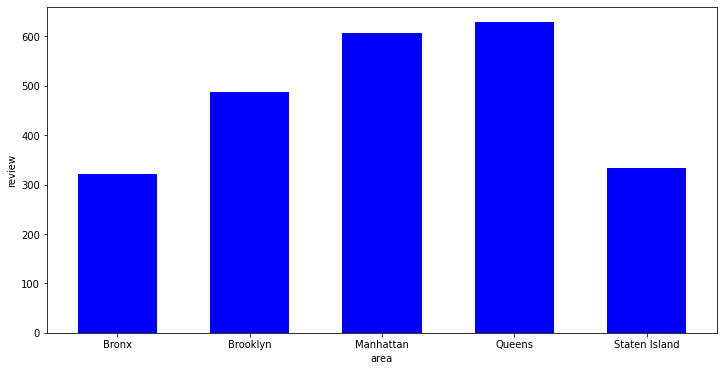

In [21]:
# showing areas vs reviews by bar graph
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']
fig = plt.figure(figsize = (12,6))

## creating bar plot
plt.bar(area,review,color = 'blue',width= .6)

plt.xlabel("area")
plt.ylabel("review")

plt.show()


In [22]:
# Find price and review connection
price_data = data.groupby(['price'])['number_of_reviews'].max().reset_index()
price_data.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


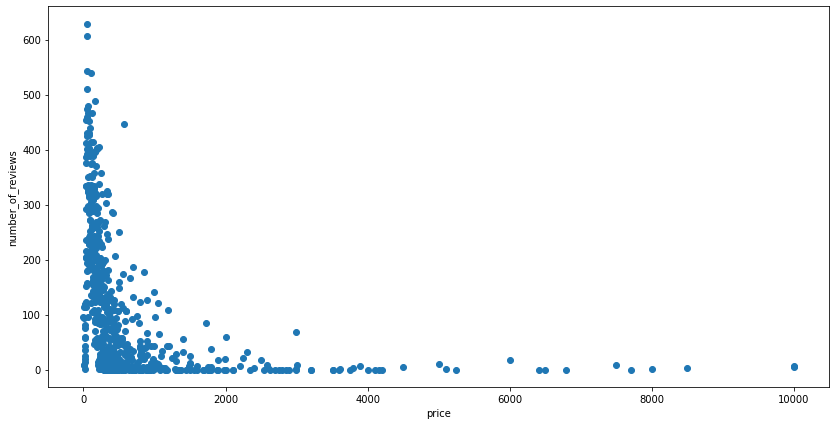

In [23]:
# showing price vs reviews by scatter graph
area = price_data['price']
price = price_data['number_of_reviews']

fig = plt.figure(figsize = (14,7))
## creating bar plot
plt.scatter(area,price)

plt.xlabel('price')
plt.ylabel('number_of_reviews')

plt.show()

Now we can find here in analysis, most of people prefer to stay in less price areas.

3. Which hosts are the busiest and why ?

In [24]:
# checking availability
data['availability_365'].max()

365

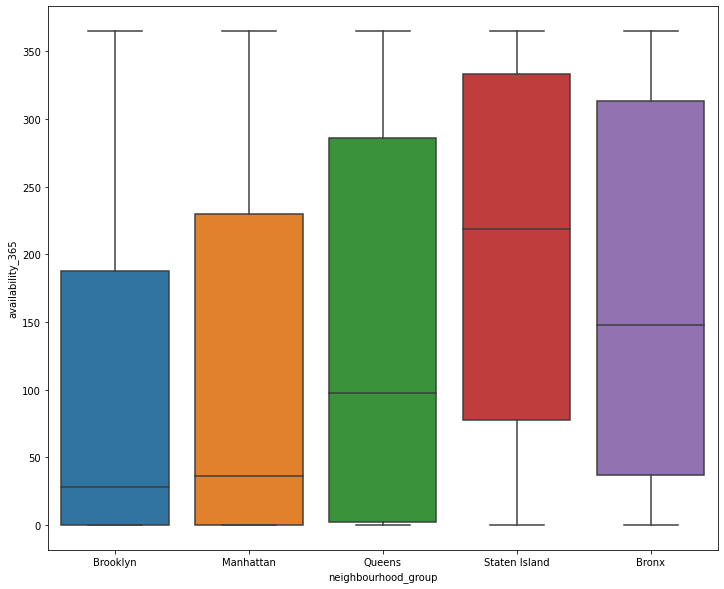

In [42]:
# check availability based on neighbourhood group
plt.figure(figsize=(12,10))
sns.boxplot(data=data, x='neighbourhood_group', y='availability_365')
plt.show()


In [25]:
# find highest room type
data['room_type'].value_counts(ascending = False)

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


Here we can see maximum number of rooms are entire home/apt and private room type.

In [26]:
# find busiest host
busiest_host_data = data.groupby(['host_name','room_type'])['number_of_reviews'].max().reset_index()
busiest_host_data = busiest_host_data.sort_values(by='number_of_reviews' , ascending=False).head(8)
busiest_host_data

,host_name,room_type,number_of_reviews
3434,Dona,Private room,629
6333,Jj,Private room,607
8978,Maya,Private room,543
2164,Carol,Private room,540
2975,Danielle,Private room,510
1214,Asa,Entire home/apt,488
13841,Wanda,Private room,480
7903,Linda,Private room,474


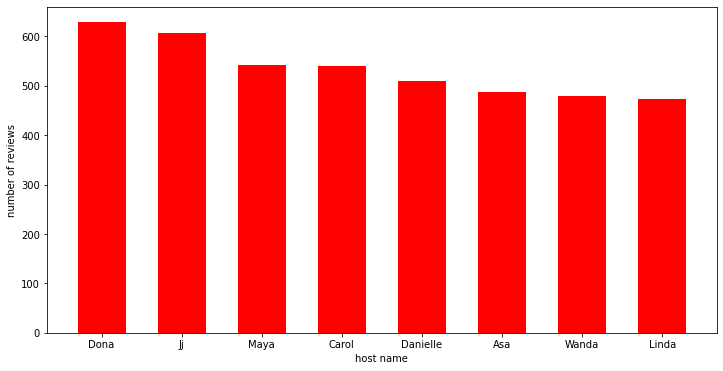

In [27]:
# showing through graph
name_data = busiest_host_data['host_name']
reviews_data = busiest_host_data['number_of_reviews']

fig = plt.figure(figsize = (12,6))

# creating the bar graph
plt.bar(name_data, reviews_data, color ='red', width=.6)
plt.xlabel('host name')
plt.ylabel('number of reviews')
plt.show()

*From above analysis we can say that busiest hosts are Dona,Ji,Maya,Carol,Danielle.
these hosts listed room type as entire home/apt and private room which is preferred by most number of people.

4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?



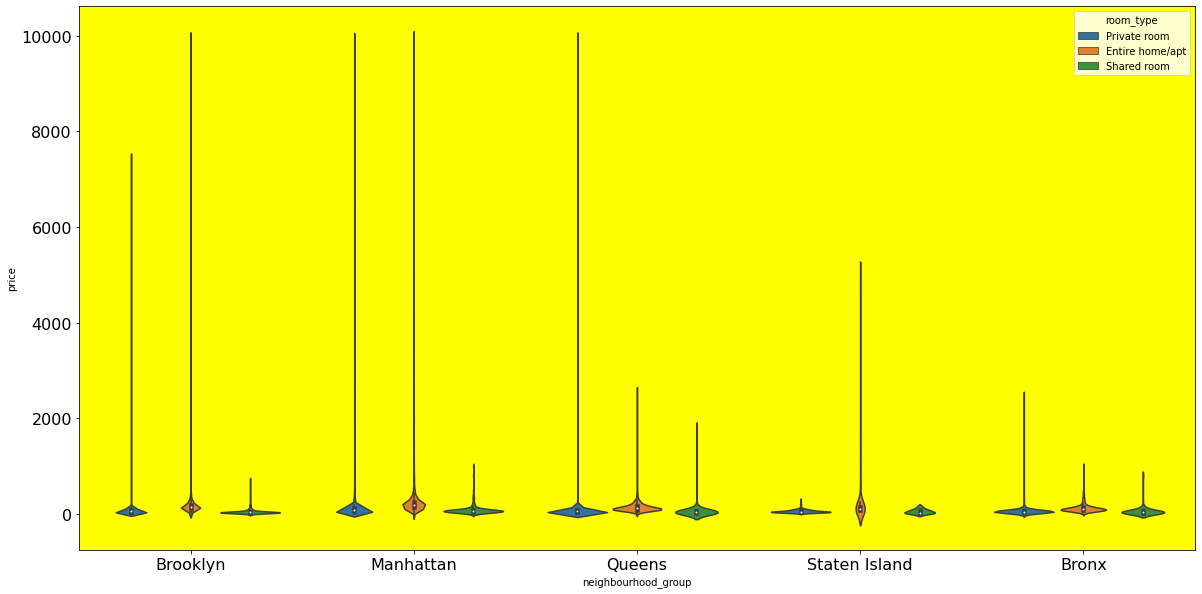

In [28]:
# check relation between neighbourhood group, room type and prices
plt.figure(figsize=(20,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.axes()
ax.set_facecolor("yellow")
#Plotting violin graph to show the catgorical feature vs price numeric column
sns.violinplot(x=data['neighbourhood_group'],y=data['price'],hue=data['room_type'])

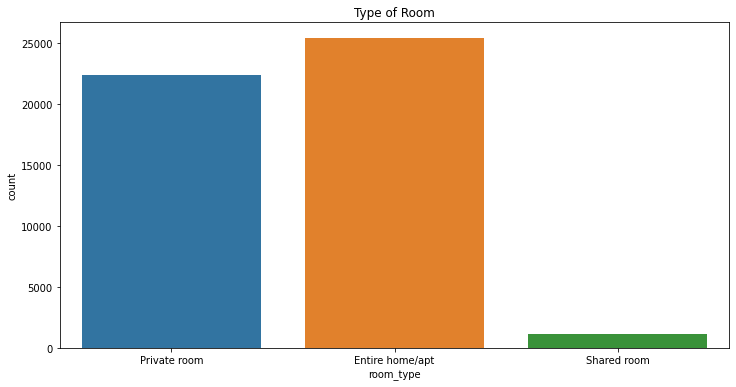

In [31]:
# we can check type of room
plt.figure(figsize=(12,6))
plt.title("Type of Room")
sns.countplot(data.room_type)
plt.show()


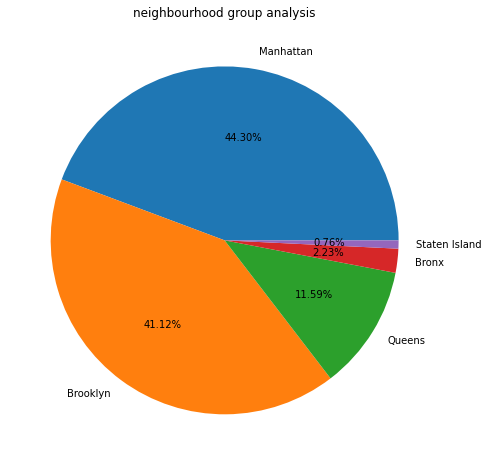

In [39]:
# neighbourhood group analysis

plt.figure(figsize=(16,8))
# creating pie graph

plt.pie(data.neighbourhood_group.value_counts(),
        labels=data.neighbourhood_group.value_counts().index,
        autopct='%2.2f%%',  startangle=360)
plt.title('neighbourhood group analysis')

plt.show()

In [40]:
# checking traffic in different areas
different_areas = data.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
different_areas.sort_values(by='minimum_nights', ascending=False)
different_areas

,neighbourhood_group,room_type,minimum_nights
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


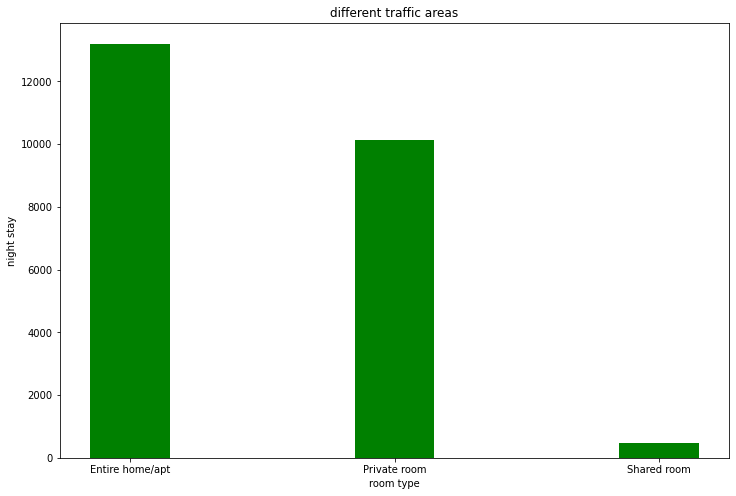

In [41]:
# showing data through graph
room = different_areas['room_type']
nights_stay = different_areas['minimum_nights']
fig= plt.figure(figsize = (12,8))

#creating the bar graph
plt.bar(room,nights_stay, color='green', width=.3)

plt.xlabel('room type')
plt.ylabel('night stay')
plt.title('different traffic areas')
plt.show()


* From above all data analysis most of the room available price below 2000 in all neighbourhoods group.
* from analysis we can say that people are preferring entire home/apt or private room in Manhattan, Brooklyn, Queens and people are preferring listings which are less in price.
*
* 

